Given a results folder, plot the rewards across context values

In [3]:

# dataframe with columns: context_mode, seed, context_value, reward
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_rewards(run_dir: str):
    """
    given a run directory, plots the rewards for each context value for each context mode
    """
    default_context_value = 10
    # run_dir = parent of current dir + run_dir
    run_dir = os.path.join(os.path.dirname(os.getcwd()), run_dir)
    reward_df = pd.DataFrame(columns=["context_mode", "seed", "context_value", "reward"])

    for root, dirs, files in os.walk(run_dir):
        for file in files:
            if file.startswith("sac_rewards_") and file.endswith(".json"):
                # files are named "sac_rewards_{env_id}_{context_mode}_{seed}.json"
                with open(os.path.join(root, file), "r") as f:
                    data = json.load(f)
                    # data is a dict with {"context_value":rewards}
                    context_mode = file.split("_")[3]
                    seed = int(file.split("_")[-1].split(".")[0])
                    for context_value, rewards in data.items():
                        for reward in rewards:
                            reward_df = reward_df.append({"context_mode": context_mode, "seed": seed, "context_value": context_value, "reward": reward}, ignore_index=True)
                        
    plt.figure(figsize=(20, 6))
    sns.violinplot(data=reward_df, x="context_value", y="reward", hue="context_mode")

    # x labels every 1
    # round the x labels

    context_values = reward_df["context_value"].unique()
    context_values = [float(x) for x in context_values]

    #plt.xticks(ticks=range(1,11), labels=[round(x, 2) for x in context_values])
    # color plot between x=0.2*default_context_value and x=2.0*default_context_value
    #x = np.linspace(0, 10, 100)
    #plt.fill_between(x, y1=1, y2=2, color='gray', alpha=0.3)
    #plt.axvspan(0.2*default_context_value, default_context_value, color="gray", alpha=0.2)
    #plt.axvspan(0.2*default_context_value, 2*default_context_value, facecolor='g', alpha=0.1)
    plt.show()

    

/tmp/ipykernel_362703/884721006.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reward_df = reward_df._append({"context_mode": context_mode, "seed": seed, "context_value": context_value, "reward": reward}, ignore_index=True)


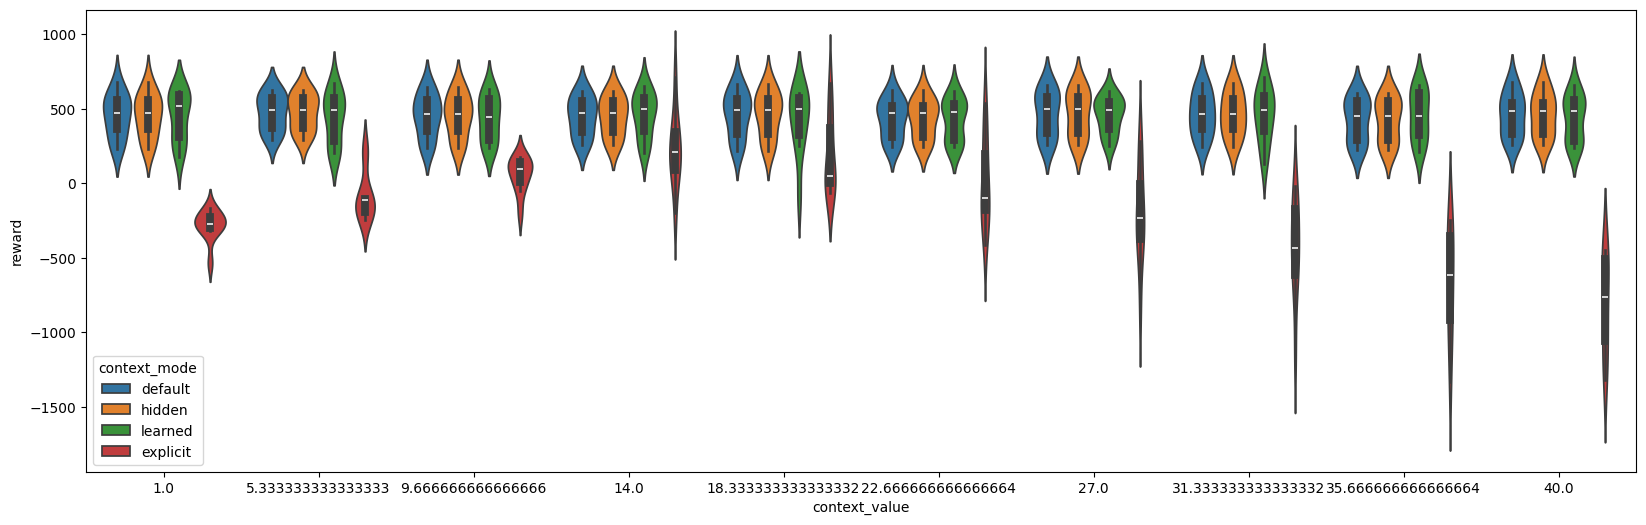

In [2]:
# Env: CARLBraxAnt, context: mass_torso, total_timesteps: 30000
# train_env : lower_bound_coeff: 0.2, upper_bound_coeff: 2.0, distribution: uniform (100 samples)
# test_env : lower_bound_coeff: 0.1, upper_bound_coeff: 4.0, distribution: discrete (10 samples) 
plot_rewards("results/hydra/multirun/2024-02-03/12-49-45")

/tmp/ipykernel_1432602/884721006.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reward_df = reward_df._append({"context_mode": context_mode, "seed": seed, "context_value": context_value, "reward": reward}, ignore_index=True)


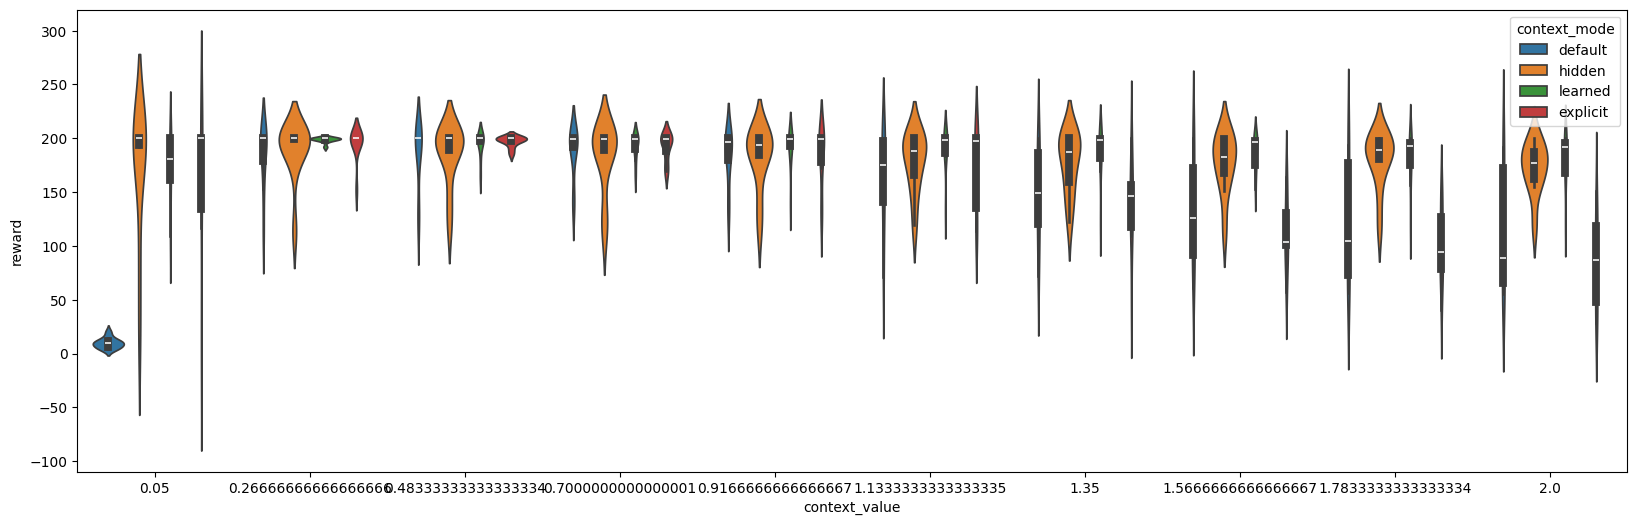

In [3]:
# Env: CARLCartpoleContinuous, context: length, total_timesteps: 30000
# train_env : lower_bound_coeff: 0.2, upper_bound_coeff: 2.0, distribution: uniform (100 samples)
# test_env : lower_bound_coeff: 0.1, upper_bound_coeff: 4.0, distribution: discrete (10 samples) 
plot_rewards("results/hydra/multirun/2024-02-03/21-16-29")


/tmp/ipykernel_2984725/2122905763.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reward_df = reward_df._append({"context_mode": context_mode, "seed": seed, "context_value": context_value, "reward": reward}, ignore_index=True)


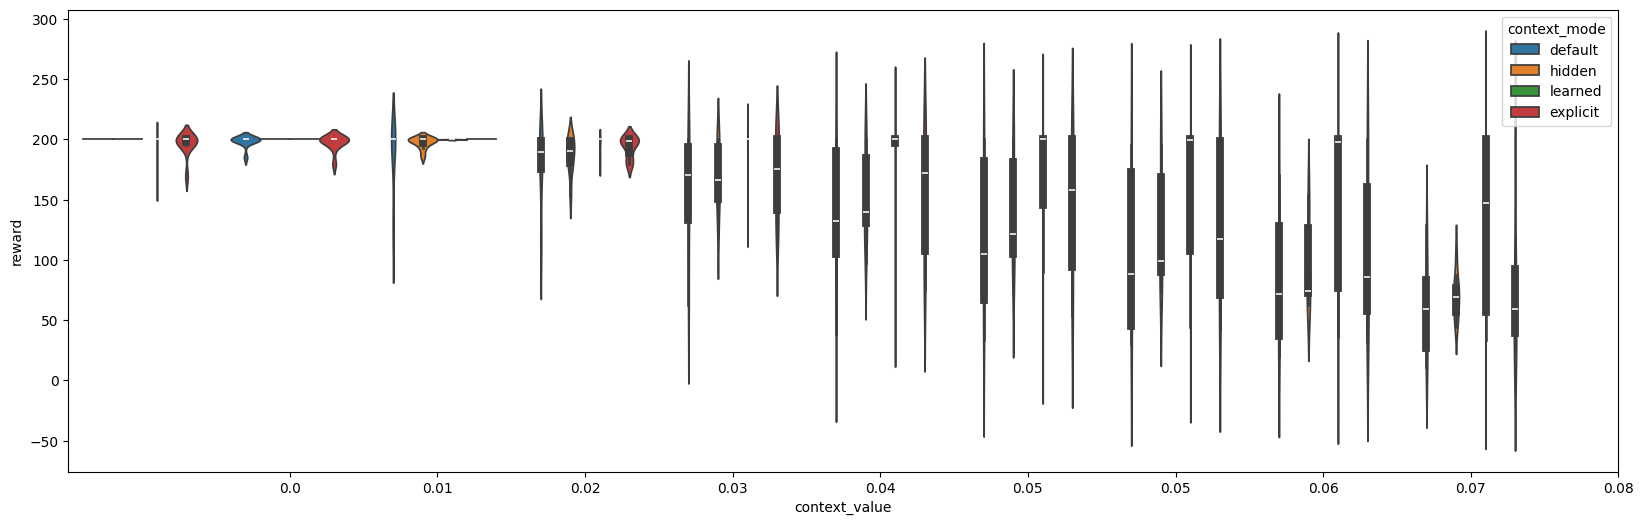

In [10]:
# Env: CARLCartpoleContinuous, context: tau, total_timesteps: 30000
# train_env : lower_bound_coeff: 0.2, upper_bound_coeff: 2.0, distribution: uniform (100 samples)
# test_env : lower_bound_coeff: 0.1, upper_bound_coeff: 4.0, distribution: discrete (10 samples) 
plot_rewards("results/hydra/multirun/2024-02-04/12-24-04")


/tmp/ipykernel_2944974/884721006.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reward_df = reward_df._append({"context_mode": context_mode, "seed": seed, "context_value": context_value, "reward": reward}, ignore_index=True)


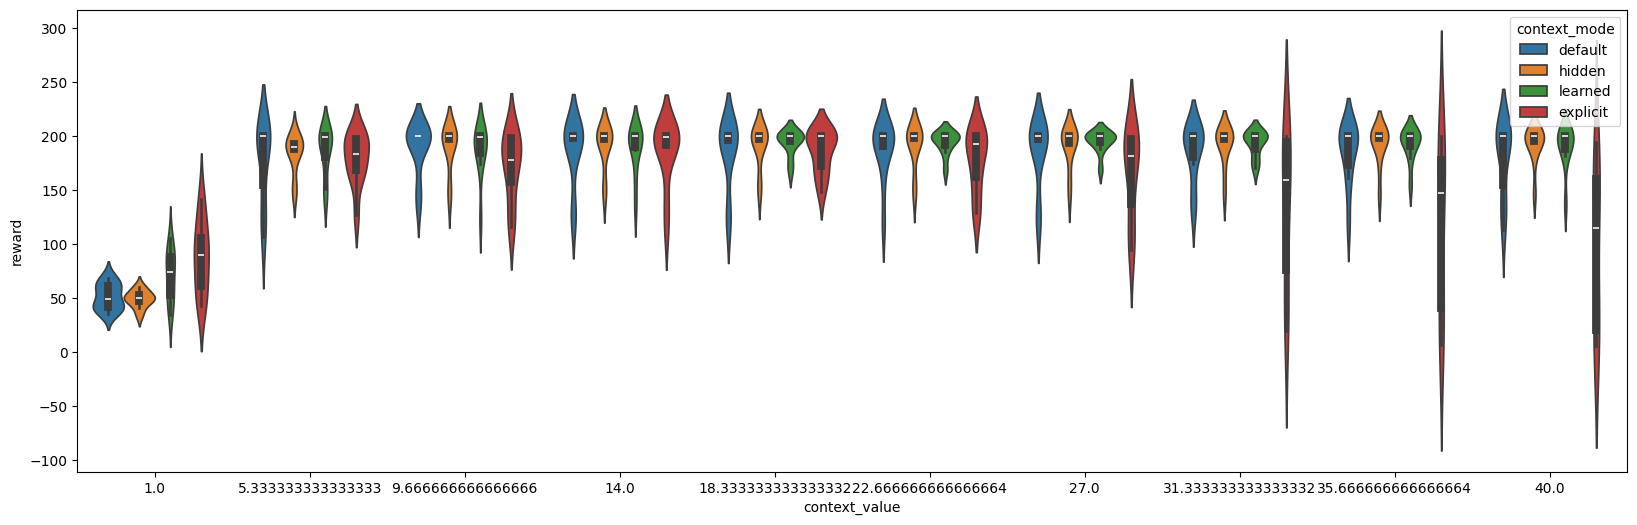

In [3]:
# Env: CARLCartpoleContinuous, context: force_mag, total_timesteps: 30000
# train_env : lower_bound_coeff: 0.2, upper_bound_coeff: 2.0, distribution: uniform (100 samples)
# test_env : lower_bound_coeff: 0.1, upper_bound_coeff: 4.0, distribution: discrete (10 samples) 
plot_rewards("results/hydra/multirun/2024-02-05/00-24-42")



/tmp/ipykernel_477428/3930549792.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reward_df = reward_df._append({"context_mode": context_mode, "seed": seed, "context_value": context_value, "reward": reward}, ignore_index=True)


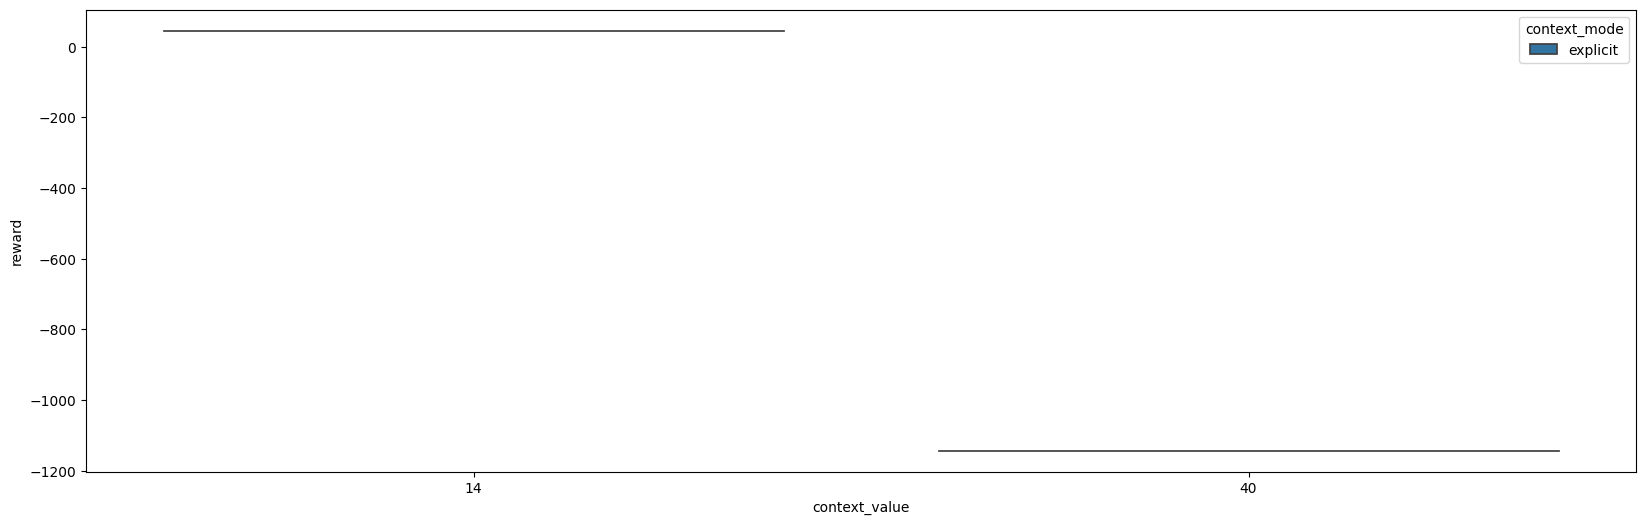

In [4]:
plot_rewards("results/hydra/single_run/2024-02-06/01-39-13")

In [27]:
from carl.envs import CARLBraxAnt
context_name = "mass_torso"
context_default = CARLBraxAnt.get_default_context()[context_name]
print(f"Default context value for {context_name}: {context_default}")
lower_bound_coeff = 0.2
upper_bound_coeff = 2.0
lower_bound, upper_bound = lower_bound_coeff*context_default, upper_bound_coeff*context_default

Default context value for mass_torso: 10.0


In [28]:
from carl.context.context_space import UniformFloatContextFeature
from carl.context.sampler import ContextSampler
context_distributions = [UniformFloatContextFeature(context_name, lower_bound, upper_bound)]

context_sampler = ContextSampler(
    context_distributions=context_distributions,
    context_space=CARLBraxAnt.get_context_space(),
    seed=0,
)
sampled_contexts = context_sampler.sample_contexts(n_contexts=100)

In [ ]:
sampled_contexts

In [47]:
train_envs = CARLBraxAnt(
            #context = sampled_contexts
        )  # not sure if ev

In [48]:
train_envs.contexts

{0: {'gravity': -9.8,
  'friction': 1.0,
  'elasticity': 0.0,
  'ang_damping': -0.05,
  'mass_torso': 10.0,
  'viscosity': 0.0}}